### ANN With Cutomer Churn Prediction- Classification

In [4]:
#!pip install pandas
#!pip install matplotlib

In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('./Data/54 Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [13]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [14]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [15]:
X.shape

(10000, 11)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
import tensorflow
print(tensorflow.__version__)

2.4.0


In [21]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [23]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train.shape

(8000, 11)

In [26]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'ANNexample',
    email = 'shabz.sjec@gmail.com')
#password ax*****m

Enter Tensordash Password :········


In [27]:
classifier.fit(
    X_train, 
    y_train, 
    epochs = 25, 
    validation_data =(X_test,y_test), 
    batch_size = 100, 
    callbacks = [histories]) # callbacks is for sending the data to app

Epoch 1/25
80/80 [==============================] - 2s 15ms/step - loss: 0.7383 - accuracy: 0.4727 - val_loss: 0.5700 - val_accuracy: 0.7410
Epoch 2/25
80/80 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7589 - val_loss: 0.5068 - val_accuracy: 0.7905
Epoch 3/25
80/80 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7986 - val_loss: 0.4733 - val_accuracy: 0.8025
Epoch 4/25
80/80 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7977 - val_loss: 0.4531 - val_accuracy: 0.8100
Epoch 5/25
80/80 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8048 - val_loss: 0.4413 - val_accuracy: 0.8130
Epoch 6/25
80/80 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.8098 - val_loss: 0.4330 - val_accuracy: 0.8165
Epoch 7/25
80/80 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8101 - val_loss: 0.4263 - val_accuracy: 0.8155
Epoch 8/25
80/80 [=

In [28]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100,callbacks = [histories])

Epoch 1/100
54/54 [==============================] - 1s 13ms/step - loss: 0.3536 - accuracy: 0.8552 - val_loss: 0.3694 - val_accuracy: 0.8501
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.8559 - val_loss: 0.3711 - val_accuracy: 0.8497
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.8574 - val_loss: 0.3691 - val_accuracy: 0.8493
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3498 - accuracy: 0.8587 - val_loss: 0.3696 - val_accuracy: 0.8482
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8571 - val_loss: 0.3695 - val_accuracy: 0.8489
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8586 - val_loss: 0.3693 - val_accuracy: 0.8470
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8606 - val_loss: 0.3693 - val_accuracy: 0.8485
Epoch 8/100


54/54 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.8664 - val_loss: 0.3615 - val_accuracy: 0.8535
Epoch 59/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3266 - accuracy: 0.8660 - val_loss: 0.3612 - val_accuracy: 0.8508
Epoch 60/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3267 - accuracy: 0.8671 - val_loss: 0.3609 - val_accuracy: 0.8527
Epoch 61/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3272 - accuracy: 0.8651 - val_loss: 0.3606 - val_accuracy: 0.8512
Epoch 62/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.8658 - val_loss: 0.3607 - val_accuracy: 0.8531
Epoch 63/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3263 - accuracy: 0.8649 - val_loss: 0.3614 - val_accuracy: 0.8527
Epoch 64/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3264 - accuracy: 0.8664 - val_loss: 0.3609 - val_accuracy: 0.8535
Epoch 65/100
54/54 

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


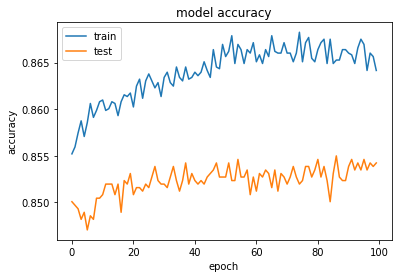

In [30]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

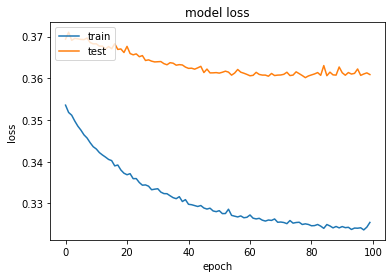

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[1507,   88],
       [ 191,  214]], dtype=int64)

In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [61]:
score

0.855